# Introduction to Deep Learning

## Objectives
In this lab, you will embark on the journey of creating a ANN, DNN model tailored for predicting the total expenditure of potential consumers based on various characteristics. As a vehicle salesperson, your goal is to develop a model that can effectively estimate the overall spending potential.

Your task is to build and train an ANN/DNN model using tensorflow in a Jupyter notebook.

Feel Free to Explore the dataset, analyze its contents, and derive meaningful insights. Additionally, feel empowered to create insightful visualizations that enhance the understanding of the data.

# Step 1: Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
pip install tensorflow


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Step 2: Load and Explore the Data

In [4]:
#df = pd.read_csv('car_purchasing.csv')

df = pd.read_csv('car_purchasing.csv', encoding='latin-1')


In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Step 3: Data Cleaning and Preprocessing


**Hint: You could use a `StandardScaler()` or `MinMaxScaler()`**

In [6]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [8]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [11]:
df = df.drop(['customer name', 'customer e-mail'], axis=1)

In [12]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify the numeric columns
numeric_columns = ['age', 'annual Salary', 'credit card debt', 'net worth']

# Separate the features and the target variable
X = df[numeric_columns]
y = df['car purchase amount']


scaler = StandardScaler()

# Fit and transform t
X_scaled = scaler.fit_transform(X)


df_scaled = pd.DataFrame(X_scaled, columns=numeric_columns)

# Concatenate
df_preprocessed = pd.concat([df_scaled, df.drop(numeric_columns, axis=1)], axis=1)


df_preprocessed.head()


,age,annual Salary,credit card debt,net worth,country,gender,car purchase amount
0,-0.550749,0.058576,0.574271,-1.110469,27,0,35321.45877
1,-0.673834,0.386570,-0.009951,0.573929,17,0,45115.52566
2,-0.387508,-0.712361,0.445452,1.193976,1,1,42925.70921
3,1.509206,1.474794,1.382369,0.675595,41,1,67422.36313
4,1.389066,-0.205111,-1.218962,0.743113,26,1,55915.46248


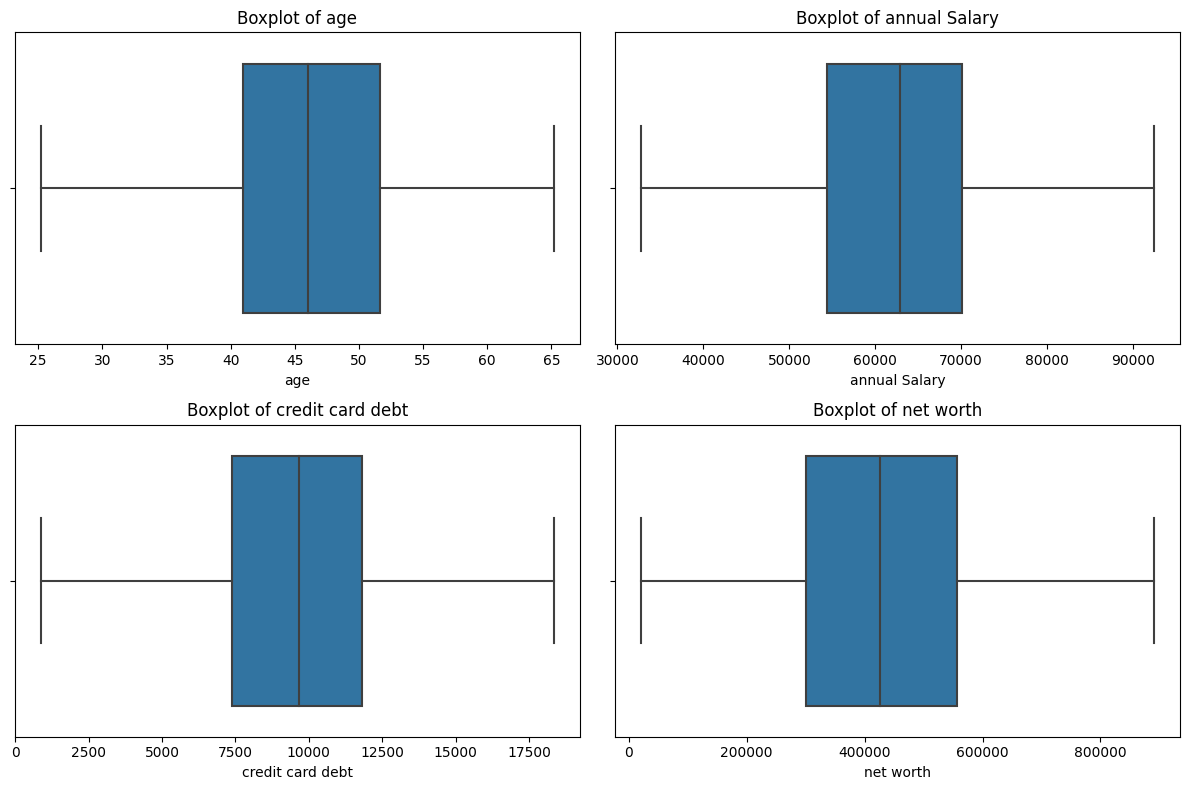

In [14]:
numeric_data = df[numeric_columns]

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = (numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)
    return outliers

outliers_df = pd.DataFrame()
for column in numeric_columns:
    outliers_df[column + '_outlier'] = detect_outliers(column)

df_with_outliers = pd.concat([df, outliers_df], axis=1)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_with_outliers[column], showfliers=False)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


# Step 4: Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = df_preprocessed[['age', 'annual Salary', 'credit card debt', 'net worth','country','gender']]
y= df_preprocessed['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (400, 6) (400,)
Testing set shape: (100, 6) (100,)


In [16]:
import tensorflow as tf

X_train =  tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test =  tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

print("X_train dtype:", X_train.dtype)
print("y_test dtype:", X_test.dtype)
print("y_train dtype:", y_train.dtype)
print("y_test dtype:", y_test.dtype)


X_train dtype: <dtype: 'float32'>
y_test dtype: <dtype: 'float32'>
y_train dtype: <dtype: 'float32'>
y_test dtype: <dtype: 'float32'>


# Step 5: Build the Artifical Neural Network Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#the input layer
model.add(Dense(128, input_dim=6, activation='relu'))

#hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


### Clarify Your Artificial Neural Network (ANN) Model, Optimization, and Loss Function Choices and justify

- Input Layer:
The input layer has 6 neurons, matching the number of features in your dataset ('age', 'annual Salary', 'credit card debt', 'net worth', 'country', 'gender').
- Hidden Layers:
There is at least one hidden layer with 128 neurons using the ReLU activation function.

- Output Layer:
The output layer has 1 neuron, which is appropriate for a regression task where the goal is to predict a continuous value.
-----------------------------------------------------------------
- ReLU Activation:ReLU is chosen as the activation function in the hidden layers. ReLU is widely used in hidden layers because it helps mitigate the vanishing gradient problem and allows the model to learn complex patterns.
Adam Optimizer:

- Adam is a popular choice due to its adaptive learning rate and momentum. It often converges faster and performs well on a variety of tasks. The specifics of the optimizer are not explicitly mentioned, but based on the output, it's likely Adam.

- Mean Squared Error (MSE) Loss:
MSE is appropriate for regression tasks, providing a measure of the average squared difference between predicted and actual values. It aligns well with the goal of minimizing overall prediction error.

# Step 6: Train the Model


In [18]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
10/10 - 1s - loss: 2073840000.0000 - mae: 44174.4883 - val_loss: 1934563968.0000 - val_mae: 42877.9180 - 924ms/epoch - 92ms/step
Epoch 2/50
10/10 - 0s - loss: 2070300928.0000 - mae: 44134.7734 - val_loss: 1930777216.0000 - val_mae: 42834.1445 - 67ms/epoch - 7ms/step
Epoch 3/50
10/10 - 0s - loss: 2065961344.0000 - mae: 44085.3359 - val_loss: 1925480832.0000 - val_mae: 42772.8203 - 61ms/epoch - 6ms/step
Epoch 4/50
10/10 - 0s - loss: 2059730304.0000 - mae: 44015.5312 - val_loss: 1918163712.0000 - val_mae: 42687.9180 - 64ms/epoch - 6ms/step
Epoch 5/50
10/10 - 0s - loss: 2050910976.0000 - mae: 43914.6641 - val_loss: 1907959424.0000 - val_mae: 42569.1484 - 45ms/epoch - 4ms/step
Epoch 6/50
10/10 - 0s - loss: 2038882304.0000 - mae: 43779.6055 - val_loss: 1894112256.0000 - val_mae: 42407.2539 - 56ms/epoch - 6ms/step
Epoch 7/50
10/10 - 0s - loss: 2023071360.0000 - mae: 43598.2930 - val_loss: 1875759872.0000 - val_mae: 42191.4375 - 52ms/epoch - 5ms/step
Epoch 8/50
10/10 - 0s - loss: 20

# Step 7: Evaluate the Model

In [19]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - loss: 662776768.0000 - mae: 21755.2969 - 86ms/epoch - 22ms/step


# Step 8: Build the Deep Neural Network Model

In [20]:
model = Sequential()

# input layer
model.add(Dense(128, input_dim=6, activation='relu'))

# hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

#output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Clarify Your Deep Neural Network (DNN) Model, Optimization, and Loss Function Choices and justify

- The model is trained for 50 epochs, with the training and validation metrics (loss and MAE) reported after each epoch.
- The training time per epoch and per step is provided, showing the efficiency of the training process.
- The validation metrics help in monitoring the model's generalization performance
-------------------------------------------------------------------------
- The choice of MAE as the loss function is appropriate for regression tasks, especially when the dataset may contain outliers.
- The model architecture and optimization algorithm choice depend on the specific requirements of the task and the characteristics of the dataset, which are not explicitly provided.

# Step 9: Train the Model

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
10/10 - 2s - loss: 2076111872.0000 - mae: 44200.1758 - val_loss: 1938092672.0000 - val_mae: 42918.6328 - 2s/epoch - 201ms/step
Epoch 2/50
10/10 - 0s - loss: 2075002624.0000 - mae: 44187.6523 - val_loss: 1936788736.0000 - val_mae: 42903.5898 - 105ms/epoch - 11ms/step
Epoch 3/50
10/10 - 0s - loss: 2073316096.0000 - mae: 44168.6797 - val_loss: 1934485248.0000 - val_mae: 42876.9688 - 66ms/epoch - 7ms/step
Epoch 4/50
10/10 - 0s - loss: 2069865088.0000 - mae: 44129.6445 - val_loss: 1929435520.0000 - val_mae: 42818.5547 - 74ms/epoch - 7ms/step
Epoch 5/50
10/10 - 0s - loss: 2063074304.0000 - mae: 44053.6875 - val_loss: 1920189440.0000 - val_mae: 42711.3516 - 74ms/epoch - 7ms/step
Epoch 6/50
10/10 - 0s - loss: 2050360704.0000 - mae: 43910.2188 - val_loss: 1903024896.0000 - val_mae: 42511.4062 - 70ms/epoch - 7ms/step
Epoch 7/50
10/10 - 0s - loss: 2027189248.0000 - mae: 43643.4922 - val_loss: 1871385344.0000 - val_mae: 42139.4922 - 75ms/epoch - 7ms/step
Epoch 8/50
10/10 - 0s - loss: 19

# Step 10: Evaluate the Model

In [22]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)


print(f'Test Mean Absolute Error: {test_mae}')


4/4 - 0s - loss: 535815936.0000 - mae: 19724.2305 - 27ms/epoch - 7ms/step
Test Mean Absolute Error: 19724.23046875


# Step 11: Evaluate and Compare Scores, Training Time, and Prediction Time of ANN/DNN Models

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time



# 1- Build a simple ANN model
model_simple = Sequential()
model_simple.add(Dense(128, input_dim=6, activation='relu'))
model_simple.add(Dense(1, activation='linear'))
model_simple.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 1- Train the simple model
start_time = time.time()
model_simple.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
training_time_simple = time.time() - start_time

# 3- Evaluate the simple model
start_time = time.time()
test_loss_simple, test_mae_simple = model_simple.evaluate(X_test, y_test, verbose=0)
prediction_time_simple = time.time() - start_time

# 1- Build a more complex ANN model
model_complex = Sequential()
model_complex.add(Dense(128, input_dim=6, activation='relu'))
model_complex.add(Dense(64, activation='relu'))
model_complex.add(Dense(32, activation='relu'))
model_complex.add(Dense(16, activation='relu'))
model_complex.add(Dense(1, activation='linear'))
model_complex.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 2-Train the complex model
start_time = time.time()
model_complex.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
training_time_complex = time.time() - start_time

# 3-Evaluate the complex model
start_time = time.time()
test_loss_complex, test_mae_complex = model_complex.evaluate(X_test, y_test, verbose=0)
prediction_time_complex = time.time() - start_time

# Compare metrics
print("Simple Model:")
print(f"Test MAE: {test_mae_simple}")
print(f"Training Time: {training_time_simple:.4f} seconds")
print(f"Prediction Time: {prediction_time_simple:.4f} seconds\n")

print("Complex Model:")
print(f"Test MAE: {test_mae_complex}")
print(f"Training Time: {training_time_complex:.4f} seconds")
print(f"Prediction Time: {prediction_time_complex:.4f} seconds")


Simple Model:
Test MAE: 41651.8125
Training Time: 5.8448 seconds
Prediction Time: 0.0744 seconds

Complex Model:
Test MAE: 19418.974609375
Training Time: 3.2871 seconds
Prediction Time: 0.0643 seconds
